In [ ]:
#mainprojectfile

In [260]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as stats

shopping_df = pd.read_csv("shopping_behavior_updated.csv")

shopping_df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [259]:
#What state has the most purchases? What are the top three states with the most purchases?

statecounts = shopping_df["Location"].value_counts()

statecounts_df = pd.DataFrame(statecounts)

max_state = statecounts_df.idxmax()
min_state = statecounts_df.idxmin()
max_state


count    Montana
dtype: object

In [249]:
#State with the most purchases
statecounts_df.max()

count    96
dtype: int64

In [261]:
#The top three states with the most purchases
statecounts.head(3)

Location
Montana       96
California    95
Idaho         93
Name: count, dtype: int64

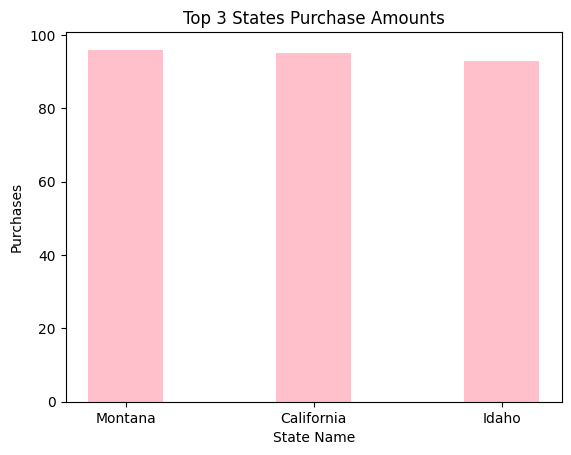

In [268]:
#Bar Graph
state_purchases = {'Montana':96,'California':95, 'Idaho':93}

states = list(state_purchases.keys())
purchases = list(state_purchases.values())

plt.bar(states, purchases, color ='pink', 
        width = 0.4)

plt.title('Top 3 States Purchase Amounts')
plt.xlabel('State Name')
plt.ylabel('Purchases')

plt.savefig('top_three_bar')
plt.show()

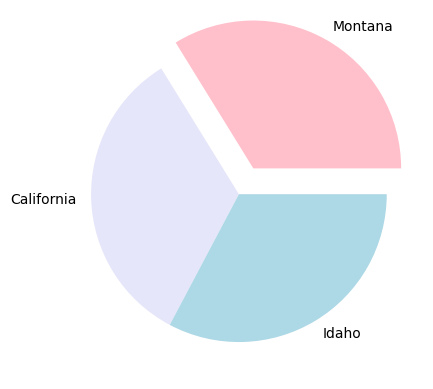

In [267]:
#Pie Chart
y = np.array([96, 95, 93])
mylabels = ["Montana", "California", "Idaho"]
mcolors = ["pink","lavender","lightblue"]
myexplode = [0.2, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, colors = mcolors)

plt.savefig('top_three_pie.png')
plt.show()

In [254]:
#t-test top three states
population_mean = shopping_df['Purchase Amount (USD)'].mean()

top_three = statecounts.head(3)
topmean = top_three.mean()
topmean

ttest_statespurchases = stats.stats.ttest_1samp(top_three, population_mean)
print(ttest_statespurchases)

TtestResult(statistic=39.575497001186925, pvalue=0.000637869087223744, df=2)


In [255]:
#compariosn of max and min
grouped_states = shopping_df.groupby('Location')
max_group = grouped_states.get_group(max_state["count"])
min_group = grouped_states.get_group(min_state["count"])

max_items = {}
min_items = {}

for item in max_group["Item Purchased"]:
    if item not in max_items:
        max_items[item] = 0
    max_items[item] += 1

for item in min_group["Item Purchased"]:
    if item not in min_items:
        min_items[item] = 0
    min_items[item] += 1

print("What "+max_state["count"]+" State Buys")
print(max_items)

print("What "+min_state["count"]+" State Buys")
print(min_items)

max_itnum = len(max_items)
min_itnum = len(min_items)

if max_itnum > min_itnum:
    print(max_state["count"] + " buys more than " + min_state["count"])
if max_itnum == min_itnum:
    print(min_state["count"] + " buys the same as " + max_state["count"])
if min_itnum > max_itnum:
    print(min_state["count"] + " buys the same as " + max_state["count"])

What Montana State Buys
{'Shirt': 4, 'Sweater': 7, 'Jewelry': 2, 'Socks': 6, 'Hat': 2, 'Sandals': 4, 'Pants': 4, 'T-shirt': 4, 'Boots': 4, 'Coat': 8, 'Shoes': 2, 'Sunglasses': 2, 'Belt': 4, 'Handbag': 6, 'Jeans': 6, 'Backpack': 5, 'Dress': 3, 'Scarf': 3, 'Shorts': 4, 'Skirt': 2, 'Gloves': 4, 'Sneakers': 2, 'Blouse': 2, 'Hoodie': 3, 'Jacket': 3}
What Kansas State Buys
{'Jacket': 3, 'Sandals': 6, 'Hoodie': 2, 'Jewelry': 5, 'Blouse': 6, 'Sunglasses': 3, 'Socks': 3, 'Pants': 3, 'Sneakers': 3, 'T-shirt': 4, 'Shorts': 3, 'Gloves': 1, 'Boots': 5, 'Shirt': 3, 'Coat': 3, 'Dress': 2, 'Belt': 2, 'Hat': 3, 'Scarf': 2, 'Backpack': 1}
Montana buys more than Kansas


In [256]:
max_to_df = pd.DataFrame.from_dict(max_items, orient='index')
max_item_bought = max_to_df.idxmax()

min_to_df = pd.DataFrame.from_dict(min_items, orient='index')
min_item_bought = min_to_df.idxmax()

print(max_state["count"] +" Seems to spend more on " + max_item_bought[0] +" while ")
print(min_state["count"] + " spends more on " + min_item_bought[0])

Montana Seems to spend more on Coat while 
Kansas spends more on Sandals


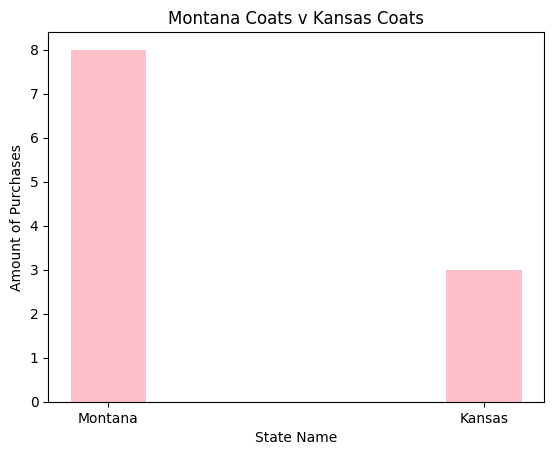

In [269]:
item_max_graph = {max_items[max_item_bought[0]] : max_state["count"] , min_items[max_item_bought[0]] : min_state["count"]}

max_keys = list(item_max_graph.keys())
max_vals = list(item_max_graph.values())

plt.bar(max_vals, max_keys, color ='pink', 
        width = 0.2)

plt.title("Montana Coats v Kansas Coats")
plt.xlabel('State Name')
plt.ylabel('Amount of Purchases')

plt.savefig('coats origin_bar_graph')

plt.show()


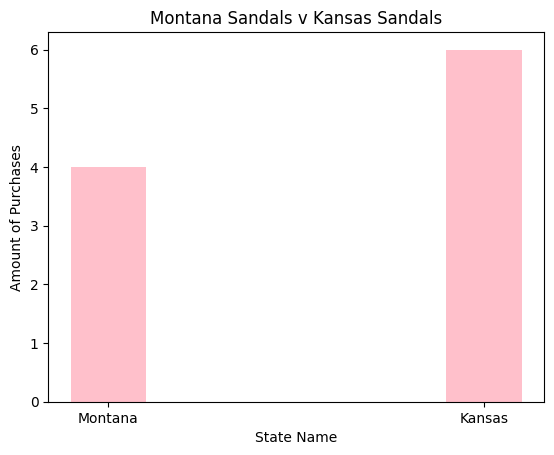

In [270]:
item_min_graph = {max_items[min_item_bought[0]] : max_state["count"] , min_items[min_item_bought[0]] : min_state["count"]}

min_keys = list(item_min_graph.keys())
min_vals = list(item_min_graph.values())

plt.bar(min_vals, min_keys, color ='pink', 
        width = 0.2)

plt.title("Montana Sandals v Kansas Sandals")
plt.xlabel('State Name')
plt.ylabel('Amount of Purchases')

plt.savefig('sandals origin_bar_graph')
plt.show()